In [135]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [136]:
df=pd.read_csv('file:///F:/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [137]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [138]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
df_columns=["sex","smoker"]
df_columns

['sex', 'smoker']

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le=LabelEncoder()

In [143]:
df['sex']=le.fit_transform(df['sex'])
                                  

In [144]:
df['smoker']=le.fit_transform(df['smoker'])

In [145]:
df

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

In [146]:
df_region=pd.get_dummies(df['region'])
df=pd.concat([df,df_region],axis='columns')


In [147]:
df=df.drop(['region'],axis='columns')

In [148]:
df

age  sex     bmi  children  smoker      charges  northeast  northwest  \
0      19    0  27.900         0       1  16884.92400          0          0   
1      18    1  33.770         1       0   1725.55230          0          0   
2      28    1  33.000         3       0   4449.46200          0          0   
3      33    1  22.705         0       0  21984.47061          0          1   
4      32    1  28.880         0       0   3866.85520          0          1   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1333   50    1  30.970         3       0  10600.54830          0          1   
1334   18    0  31.920         0       0   2205.98080          1          0   
1335   18    0  36.850         0       0   1629.83350          0          0   
1336   21    0  25.800         0       0   2007.94500          0          0   
1337   61    0  29.070         0       1  29141.36030          0          1   

      southeast  southwest  
0             0          1  
1             1          0  
2             1          0  
3             0          0  
4             0          0  
...         ...        ...  
1333          0          0  
1334          0          0  
1335          1          0  
1336          0          1  
1337          0          0  

[1338 rows x 10 columns]

In [149]:
df.shape

(1338, 10)

In [150]:
corr=df.corr()
corr

age       sex       bmi  children    smoker   charges  \
age        1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008   
sex       -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292   
bmi        0.109272  0.046371  1.000000  0.012759  0.003750  0.198341   
children   0.042469  0.017163  0.012759  1.000000  0.007673  0.067998   
smoker    -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251   
charges    0.299008  0.057292  0.198341  0.067998  0.787251  1.000000   
northeast  0.002475 -0.002425 -0.138156 -0.022808  0.002811  0.006349   
northwest -0.000407 -0.011156 -0.135996  0.024806 -0.036945 -0.039905   
southeast -0.011642  0.017117  0.270025 -0.023066  0.068498  0.073982   
southwest  0.010016 -0.004184 -0.006205  0.021914 -0.036945 -0.043210   

           northeast  northwest  southeast  southwest  
age         0.002475  -0.000407  -0.011642   0.010016  
sex        -0.002425  -0.011156   0.017117  -0.004184  
bmi        -0.138156  -0.135996   0.270025  -0.006205  
children   -0.022808   0.024806  -0.023066   0.021914  
smoker      0.002811  -0.036945   0.068498  -0.036945  
charges     0.006349  -0.039905   0.073982  -0.043210  
northeast   1.000000  -0.320177  -0.345561  -0.320177  
northwest  -0.320177   1.000000  -0.346265  -0.320829  
southeast  -0.345561  -0.346265   1.000000  -0.346265  
southwest  -0.320177  -0.320829  -0.346265   1.000000

In [151]:
df

age  sex     bmi  children  smoker      charges  northeast  northwest  \
0      19    0  27.900         0       1  16884.92400          0          0   
1      18    1  33.770         1       0   1725.55230          0          0   
2      28    1  33.000         3       0   4449.46200          0          0   
3      33    1  22.705         0       0  21984.47061          0          1   
4      32    1  28.880         0       0   3866.85520          0          1   
...   ...  ...     ...       ...     ...          ...        ...        ...   
1333   50    1  30.970         3       0  10600.54830          0          1   
1334   18    0  31.920         0       0   2205.98080          1          0   
1335   18    0  36.850         0       0   1629.83350          0          0   
1336   21    0  25.800         0       0   2007.94500          0          0   
1337   61    0  29.070         0       1  29141.36030          0          1   

      southeast  southwest  
0             0          1  
1             1          0  
2             1          0  
3             0          0  
4             0          0  
...         ...        ...  
1333          0          0  
1334          0          0  
1335          1          0  
1336          0          1  
1337          0          0  

[1338 rows x 10 columns]

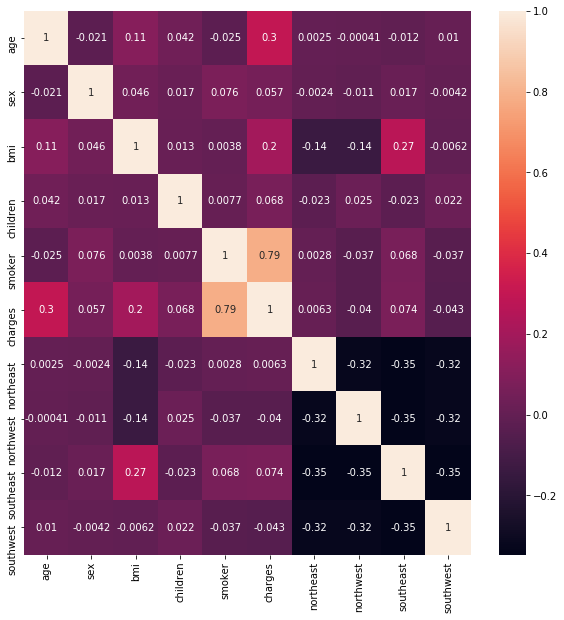

In [152]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

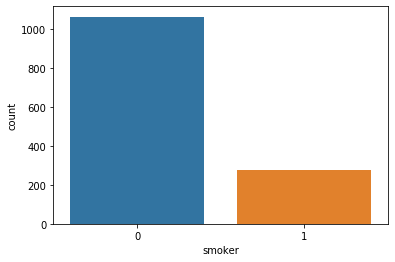

In [153]:
sns.countplot(df['smoker'])

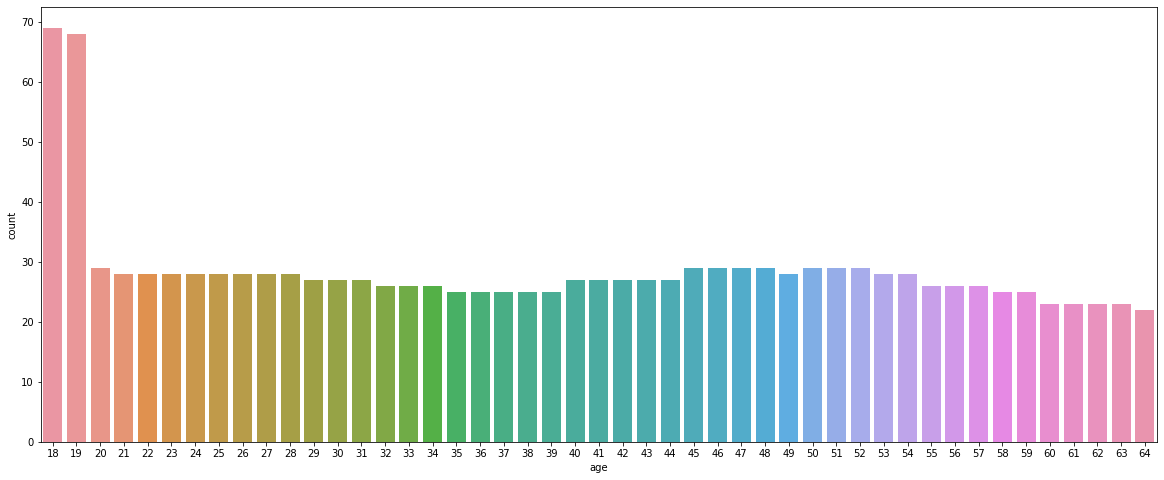

In [154]:
plt.figure(figsize=(20,8))
sns.countplot(df['age'])

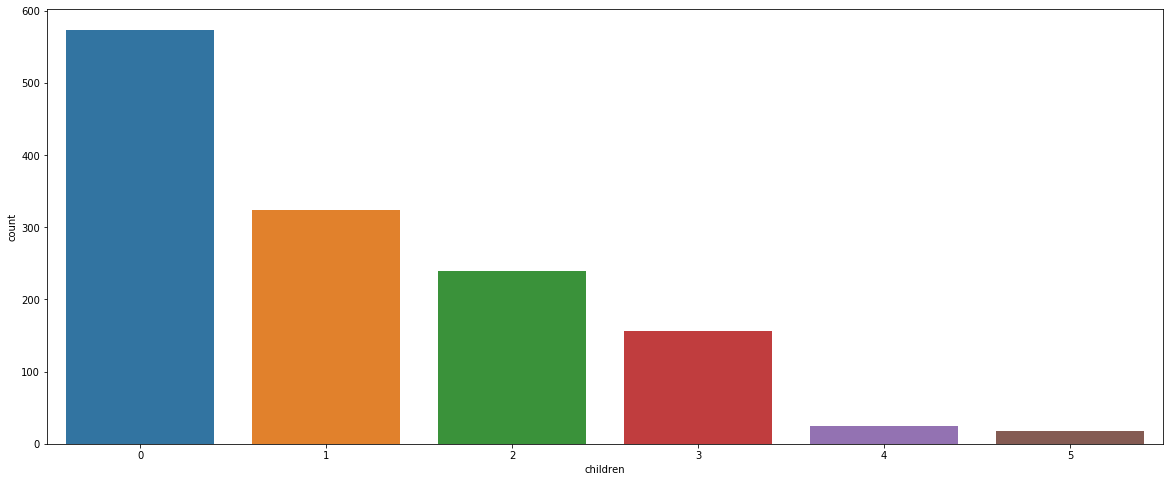

In [155]:
plt.figure(figsize=(20,8))
sns.countplot(df['children'])

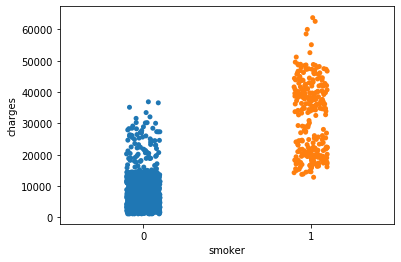

In [156]:
sns.stripplot(x='smoker', y='charges',data=df)

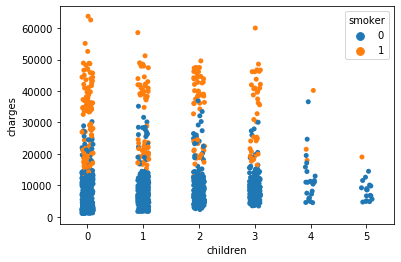

In [157]:
sns.stripplot(x='children', y='charges',data=df,hue='smoker')

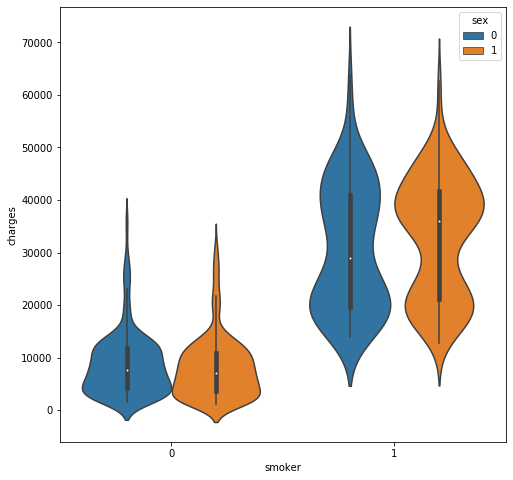

In [158]:
plt.figure(figsize=(8,8))
sns.violinplot(x='smoker', y='charges',data=df,hue='sex')

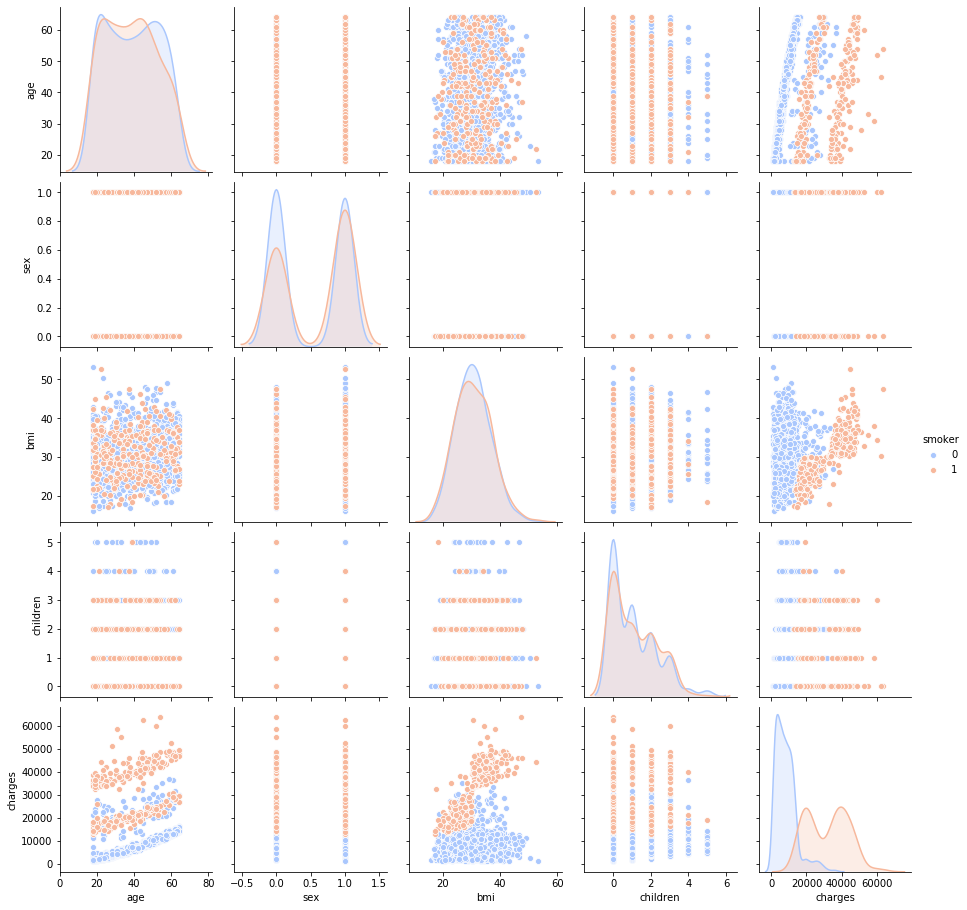

In [159]:
sns.pairplot(df.drop(["northeast","northwest","southeast","southwest"],axis=1),hue="smoker",palette="coolwarm")

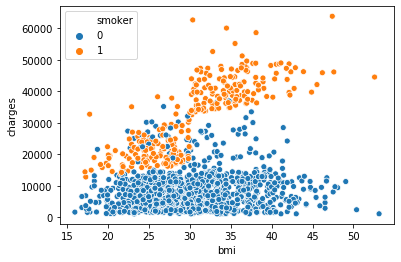

In [160]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)

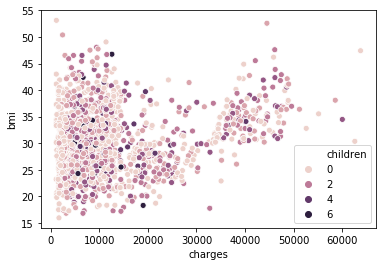

In [161]:
sns.scatterplot(x="charges",y="bmi",hue="children",data=df)

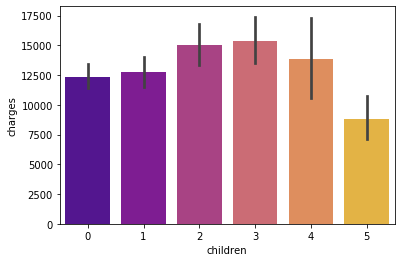

In [162]:
sns.barplot(x ='children', y ='charges', data = df,palette ='plasma')

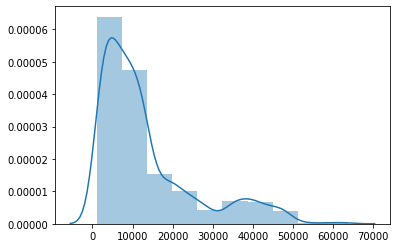

In [163]:
sns.distplot(df[['charges']],bins=10)

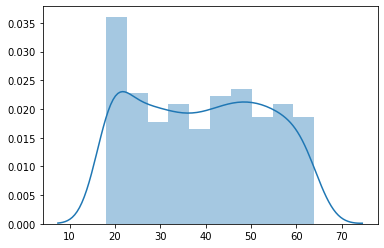

In [164]:
sns.distplot(df[['age']],bins=10)

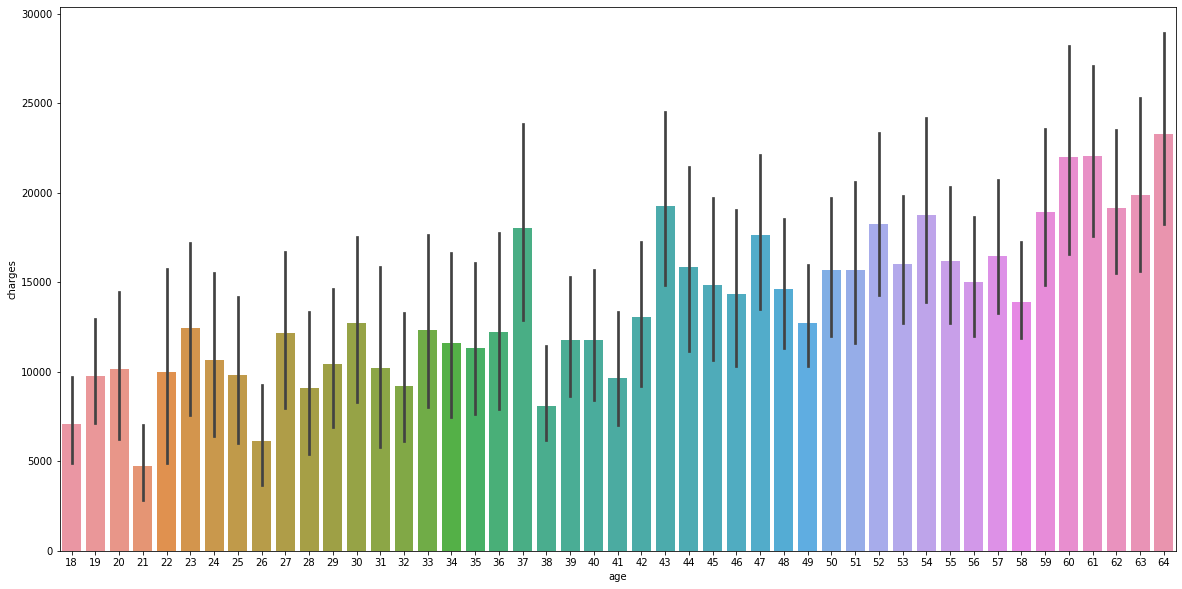

In [165]:
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='charges',data=df)

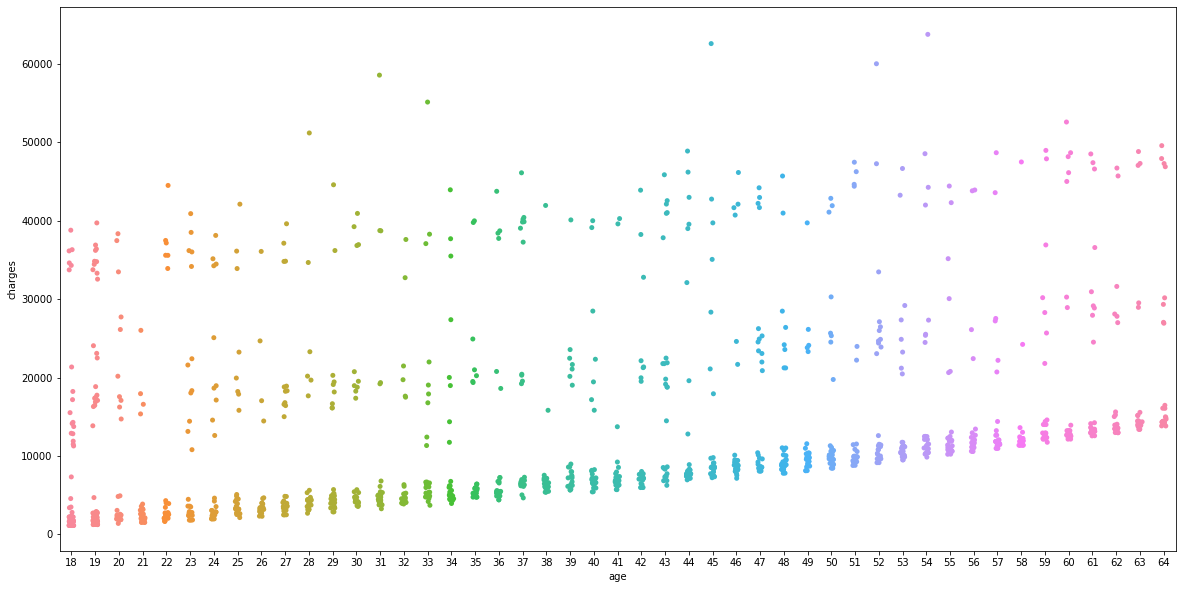

In [166]:
plt.figure(figsize=(20,10))
sns.stripplot(x='age',y='charges',data=df)

In [167]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [168]:
df.head()

age  sex     bmi  children  smoker      charges  northeast  northwest  \
0   19    0  27.900         0       1  16884.92400          0          0   
1   18    1  33.770         1       0   1725.55230          0          0   
2   28    1  33.000         3       0   4449.46200          0          0   
3   33    1  22.705         0       0  21984.47061          0          1   
4   32    1  28.880         0       0   3866.85520          0          1   

   southeast  southwest  
0          0          1  
1          1          0  
2          1          0  
3          0          0  
4          0          0

In [169]:
df=df.drop(['northeast','northwest', 'southeast', 'southwest'],axis='columns')

In [170]:
df

age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]

In [171]:
x=df.smoker.values
y=df.bmi.values

In [172]:
x=x.reshape(-1,1)

In [173]:
y=y.reshape(-1,1)

In [174]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [175]:
xtrain.shape

(936, 1)

In [176]:
ytrain.shape

(936, 1)

In [189]:
import sweetviz as sv

In [190]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [191]:
from IPython.display import IFrame

In [192]:
IFrame(src='Analyze.html',width=1000,height=600)

In [193]:
from dataprep.eda import *

  0%|          | 0/846 [00:00<?, ?it/s]

DataPrep Report
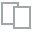
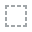
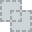
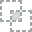
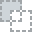
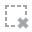
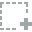
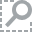
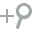
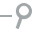
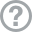
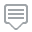
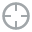
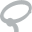
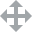
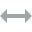
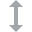
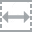
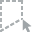
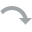
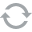
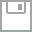
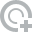
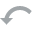
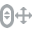
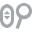
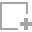
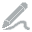
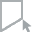
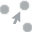
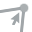
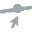

In [194]:
create_report(df)

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [197]:
mns=MinMaxScaler()
feat=['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
df[feat]=mns.fit_transform(df[feat])
df

age  sex       bmi  children  smoker   charges
0     0.021739  0.0  0.321227       0.0     1.0  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.043816
...        ...  ...       ...       ...     ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.447249

[1338 rows x 6 columns]

In [198]:
from sklearn.preprocessing import StandardScaler

In [199]:
std=StandardScaler()
feat=['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
df[feat]=std.fit_transform(df[feat])
df

age       sex       bmi  children    smoker   charges
0    -1.438764 -1.010519 -0.453320 -0.908614  1.970587  0.298584
1    -1.509965  0.989591  0.509621 -0.078767 -0.507463 -0.953689
2    -0.797954  0.989591  0.383307  1.580926 -0.507463 -0.728675
3    -0.441948  0.989591 -1.305531 -0.908614 -0.507463  0.719843
4    -0.513149  0.989591 -0.292556 -0.908614 -0.507463 -0.776802
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926 -0.507463 -0.220551
1334 -1.509965 -1.010519  0.206139 -0.908614 -0.507463 -0.914002
1335 -1.509965 -1.010519  1.014878 -0.908614 -0.507463 -0.961596
1336 -1.296362 -1.010519 -0.797813 -0.908614 -0.507463 -0.930362
1337  1.551686 -1.010519 -0.261388 -0.908614  1.970587  1.311053

[1338 rows x 6 columns]